In [28]:
import pandas as pd
from matplotlib import pyplot
from datascience import *
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [29]:
df = pd.read_csv('./PI_2020.csv')

In [30]:
appIds = pd.read_csv('./sspd_apps.csv')

## Null Hypothesis H0 : In the Dataset, the number of  incidents for applications with and without SSPD are similar. The difference in the sample is due to chance. 

## Alternative Hypothesis H1 :  In the Dataset, the number of incidents for applications with SSPD have lower incidents, on average, than the applications without SSPD. 

## Test Statistic :  Difference between the means of two group 

## **** Exploratory Data Analysis ********

In [31]:
df.shape

(217207, 42)

In [32]:
df.head(5)

,TASK,CONFIGURATION_ITEM,SOURCE_TOOL,SOURCE_TOOL_1,CATEGORY,CHILD_INCIDENTS,CLOSE_CODE,STATE,REOPEN_COUNT,RESOLVED_AT_EST,SUBCATEGORY,ASSIGNED_TO_CORP_ID,CLOSED_EST,CREATED_DATE_EST,ESCALATION,ENVIRONMENT,IMPACT,LOCATION,OPENED_AT_EST,PRIORITY,URGENCY,UPDATED_DATE_EST,CI_SYMPTOM_NAME,OWNING_BU_CODE,OWNING_BU_DESC,CI_TYPE,APPLICATION_ID,BG_CODE,INT_OR_EXT_ACCESSIBLE_APP,LATENCY_COMPONENT,SECURITY_TIER,CRITICALITY_CODE_VALUE,CRITICALITY_CODE,APPLICATION_DISCOVERABLE,APPLICATION_DISCOVERABLE_1,AUTHENTICATION_IDENTITY_STORE,INVESTMENT_POSTURE,HIGH_RISK_APPLICATION,LIFE_CYCLE_STAGE,PROGRAMMING_LANGUAGE,CLIENT_BASED_APPLICATION,CERTIFICATION_STATUS
0,INC194397937,AP110085,SN,SN,Servers and Storage,0,Closed (Routine Resolution),Closed,0,31-DEC-19,Connectivity Issues,a616976,07-JAN-20,31-DEC-19,Normal,Production,4 - Low,MER/3014/1G/1GB529,31-DEC-19,6 - Best effort,3 - Low,07-JAN-20,CONNECTIVITY ISSUES,PIY,PI Technology BU,Linux Server,AP110085,PI,No,No,A,3,3,YES,YES,FBSI,Hold,No,Production,"HTML,JavaScript,Java",Yes,Current
1,INC194397937,AP107952,SN,SN,Servers and Storage,0,Closed (Routine Resolution),Closed,0,31-DEC-19,Connectivity Issues,a616976,07-JAN-20,31-DEC-19,Normal,Production,4 - Low,MER/3014/1G/1GB529,31-DEC-19,6 - Best effort,3 - Low,07-JAN-20,CONNECTIVITY ISSUES,PIY,PI Technology BU,Linux Server,AP107952,PI,No,No,C,3,3,YES,YES,(None),Hold,No,Production,"Java,SQL",No,Out of Date
2,INC194398491,AP125405,SN,SN,Software Applications,0,Closed (Routine Resolution),Closed,0,31-DEC-19,Errors & Performance,a574135,07-JAN-20,31-DEC-19,Normal,Production,4 - Low,1999,31-DEC-19,6 - Best effort,3 - Low,07-JAN-20,ERRORS & PERFORMANCE,SYS,Enterprise Infrastructure,Registered Application,AP125405,PI,No,No,D,4,4,YES,YES,Active Directory,Buy,No,Production,JavaScript,No,Current
3,INC194398491,AP130459,SN,SN,Software Applications,0,Closed (Routine Resolution),Closed,0,31-DEC-19,Errors & Performance,a574135,07-JAN-20,31-DEC-19,Normal,Production,4 - Low,1999,31-DEC-19,6 - Best effort,3 - Low,07-JAN-20,ERRORS & PERFORMANCE,SYS,Enterprise Infrastructure,Registered Application,AP130459,PI,No,No,D,4,4,YES,YES,Active Directory,Buy,No,Production,JavaScript,No,Current
4,INC194398986,AP110085,SN,SN,Software Applications,0,Closed (Offered Solution),Closed,0,31-DEC-19,Errors & Performance,a647222,07-JAN-20,31-DEC-19,Normal,Production,4 - Low,MER/3014/2F/2FH2512,31-DEC-19,6 - Best effort,3 - Low,07-JAN-20,ERRORS & PERFORMANCE,SYS,Enterprise Infrastructure,Registered Application,AP110085,PI,No,No,A,3,3,YES,YES,FBSI,Hold,No,Production,"HTML,JavaScript,Java",Yes,Current


In [33]:
#df.groupby('CRITICALITY_CODE').count()

In [34]:
df = df.rename(columns={'CONFIGURATION_ITEM':'AppId','RESOLVED_AT_EST':'RESOLVEDATE','CLOSED_EST':'CLOSEDATE',
                        'OPENED_AT_EST':'OPENDATE','HIGH_RISK_APPLICATION':'HIGH_RISK'})

In [35]:
appIds.head(5)

,AppId,Udeploy application,App Name,Squad,Tribe,Sonar%,SSPD Install,ACM Install,Details
0,AP124765,WMR-CLOUD,Relationship Bricklet on Fidelity.com,Desperately Seeking Sally,E2E Omni-Channel WM Experience,85.5,07/17/2019,08/14/2019,View Details
1,AP124140,STATEAPI-CLOUD,StateAPI,Data Services,Platform Engineering and Cloud Advancement,83.1,04/10/2019,05/08/2019,View Details
2,AP133518,SSCSIPEXPTRK-CLOUD,SS&C Stay In Plan Expiry Tracker,SS&C,Other,86.2,'-,'-,View Details
3,AP130217,SCB-CFT-CLOUD-CFN,Stacked Debit Card Batch,Stacked Cards,Retirement and Income Solutions,94.1,11/11/2019,'-,View Details
4,AP111079,RTQ-ECS,PI Search Runtime Query Service,HAWCX,Content Management,83,01/23/2020,'-,View Details


In [36]:
appIdList = appIds['AppId']
appIdList = appIdList.unique()

In [37]:
df['SSPD']=df['AppId'].isin(appIdList)
df['SSPD']= df['SSPD'].apply(lambda x : 0 if not x else 1)

In [38]:
df['SSPD'].value_counts()
print('Unique Application IDs : {}'.format(len(df['AppId'].unique())))
print('Total Number of Applications with SSPD : {}'.format(len(appIdList)))
print('Total Number of Icidents for Applications WITHOUT SSPD : {}'.format(df['SSPD'].value_counts()[0]))
print('Total Number of Icidents for Applications WITH SSPD : {}'.format(df['SSPD'].value_counts()[1]))

Unique Application IDs : 1102
Total Number of Applications with SSPD : 277
Total Number of Icidents for Applications WITHOUT SSPD : 187443
Total Number of Icidents for Applications WITH SSPD : 29764


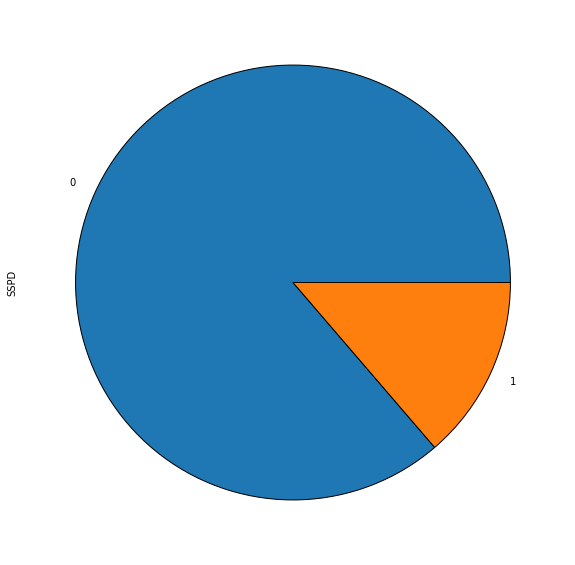

In [39]:
df['SSPD'].value_counts().plot(kind='pie')

In [40]:
ids= df.AppId.unique()
count= df['AppId'].value_counts()
appDf = pd.DataFrame({'id':ids,'count':count})
df_grouped = df.groupby('AppId')
#len(appDf)

In [41]:
df_grouped = df.drop_duplicates(subset='AppId', keep='last')
df_grouped = df_grouped.set_index('AppId').join(appDf.set_index('id'))
df_grouped = df_grouped.reset_index()
pd.set_option('display.max_columns',None)
df_grouped.sort_values(by='count',ascending=False).head(100)

,AppId,TASK,SOURCE_TOOL,SOURCE_TOOL_1,CATEGORY,CHILD_INCIDENTS,CLOSE_CODE,STATE,REOPEN_COUNT,RESOLVEDATE,SUBCATEGORY,ASSIGNED_TO_CORP_ID,CLOSEDATE,CREATED_DATE_EST,ESCALATION,ENVIRONMENT,IMPACT,LOCATION,OPENDATE,PRIORITY,URGENCY,UPDATED_DATE_EST,CI_SYMPTOM_NAME,OWNING_BU_CODE,OWNING_BU_DESC,CI_TYPE,APPLICATION_ID,BG_CODE,INT_OR_EXT_ACCESSIBLE_APP,LATENCY_COMPONENT,SECURITY_TIER,CRITICALITY_CODE_VALUE,CRITICALITY_CODE,APPLICATION_DISCOVERABLE,APPLICATION_DISCOVERABLE_1,AUTHENTICATION_IDENTITY_STORE,INVESTMENT_POSTURE,HIGH_RISK,LIFE_CYCLE_STAGE,PROGRAMMING_LANGUAGE,CLIENT_BASED_APPLICATION,CERTIFICATION_STATUS,SSPD,count
1088,AP110085,INC205080309,SN,SN,Servers and Storage,0,Closed (Routine Resolution),Resolved,0,28-MAY-20,Connectivity Issues,a646294,NaN,27-MAY-20,Normal,Production,4 - Low,RAL/6164/04/04D7512,27-MAY-20,6 - Best effort,3 - Low,28-MAY-20,CONNECTIVITY ISSUES,PIY,PI Technology BU,Linux Server,AP110085,PI,No,No,A,3,3,YES,YES,FBSI,Hold,No,Production,"HTML,JavaScript,Java",Yes,Current,0,8166
1087,AP107952,INC205080309,SN,SN,Servers and Storage,0,Closed (Routine Resolution),Resolved,0,28-MAY-20,Connectivity Issues,a646294,NaN,27-MAY-20,Normal,Production,4 - Low,RAL/6164/04/04D7512,27-MAY-20,6 - Best effort,3 - Low,28-MAY-20,CONNECTIVITY ISSUES,PIY,PI Technology BU,Linux Server,AP107952,PI,No,No,C,3,3,YES,YES,(None),Hold,No,Production,"Java,SQL",No,Out of Date,0,6615
1083,AP125405,INC205077761,SN,SN,Software Applications,0,Closed (Offered Solution),Resolved,0,27-MAY-20,Identity & Access Management,a574135,NaN,27-MAY-20,Normal,Production,4 - Low,RAL/6163/LN/LNJ1146,27-MAY-20,6 - Best effort,3 - Low,27-MAY-20,IDENTITY & ACCESS MANAGEMENT,IIT,FMR India Technology Services BU,Registered Application,AP125405,PI,No,No,D,4,4,YES,YES,Active Directory,Buy,No,Production,JavaScript,No,Current,1,5659
1082,AP130459,INC205077761,SN,SN,Software Applications,0,Closed (Offered Solution),Resolved,0,27-MAY-20,Identity & Access Management,a574135,NaN,27-MAY-20,Normal,Production,4 - Low,RAL/6163/LN/LNJ1146,27-MAY-20,6 - Best effort,3 - Low,27-MAY-20,IDENTITY & ACCESS MANAGEMENT,IIT,FMR India Technology Services BU,Registered Application,AP130459,PI,No,No,D,4,4,YES,YES,Active Directory,Buy,No,Production,JavaScript,No,Current,0,4933
1085,AP103220,INC205079474,SN,SN,Software Applications,0,Solved Remotely,Resolved,0,27-MAY-20,Errors & Performance,a612000,NaN,27-MAY-20,Normal,Production,4 - Low,MER/3014/2E/2EB1618,27-MAY-20,6 - Best effort,3 - Low,27-MAY-20,ERRORS & PERFORMANCE,SYS,Enterprise Infrastructure,Registered Application,AP103220,PI,No,No,A,1,1,YES,YES,FBSI,Hold,No,Production,"C#,XSLT,XML,Visual C++,HTML,VBScript,C++,DHTML...",Yes,Current,0,4854
1095,AX001147,INC205083492,SN,SN,Software Applications,0,Solved (Workaround),Resolved,0,28-MAY-20,Data Issues,a459943,NaN,28-MAY-20,Normal,Production,4 - Low,COV/1078/01/01M71112,28-MAY-20,6 - Best effort,3 - Low,28-MAY-20,DATA ISSUES,TPS,Fidelity Brokerage Technology,Registered Application,AX001147,PI,No,No,A,1,1,YES,YES,Application Specific,Sell,No,Production,Java,No,Current,0,4458
858,AP110174,INC204527811,SN,SN,Servers and Storage,0,NaN,New,0,NaN,Connectivity Issues,NaN,NaN,26-JAN-20,Normal,Non-Production,4 - Low,MER/3014/1G/1GB529,26-JAN-20,6 - Best effort,3 - Low,26-JAN-20,CONNECTIVITY ISSUES,TEC,Function: Technology,Linux Server,AP110174,PI,No,No,A,1,1,NO,NO,Corporate PIN Server,Sell,Yes,Production,Java,No,Current,0,4421
728,AP112293,INC204431294,SN,SN,Software Applications,0,Solved by Automation,Closed,0,02-MAR-20,Connecting & Communicating,a457475,09-MAR-20,07-JAN-20,Normal,Non-Production,4 - Low,MER/3014/1G/1GB529,07-JAN-20,6 - Best effort,3 - Low,09-MAR-20,CONNECTING & COMMUNICATING,SYS,Enterprise Infrastructure,Registered Application,AP112293,PI,No,No,B,1,1,YES,YES,LDAP,Hold,No,Production,Java,No,Current,0,3950
911,AP119587,INC204823577,SN,SN,Software Applications,0,Incident Transferred to a Request,Closed,0,30-MAR-20,Other Application Topics,srvservicenow,30-MAR-20,30-MAR-20,Normal,

In [42]:
df_grouped_sspd = df_grouped.loc[df_grouped['SSPD']==1]
#df_grouped_sspd

In [43]:
df_AppIds_morethanfiveincidents = df_grouped[df_grouped['count']>5]
len(df_AppIds_morethanfiveincidents)

868

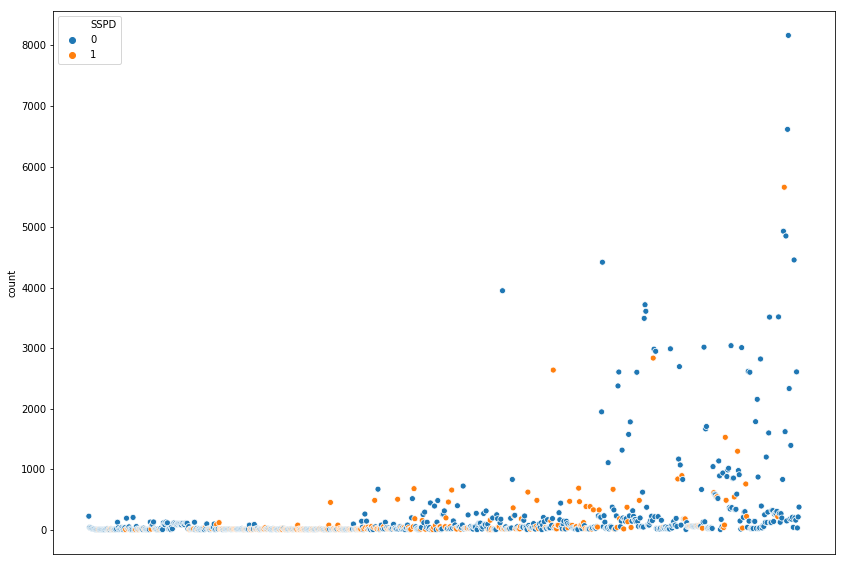

In [44]:
sns.scatterplot(x='AppId',y='count',hue='SSPD',data=df_AppIds_morethanfiveincidents)
ax = pyplot.axes()
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
pyplot.rcParams["figure.figsize"] = (10,10)
pyplot.show()
pyplot.close()
#df_bigGroups

In [45]:
impacts= df['IMPACT'].str.split("-",n=1,expand=True) 
df['ImpactNumber'] = impacts.loc[:,0]

In [46]:
df_incident = df.drop_duplicates(subset='TASK', keep='last')
#df_incident

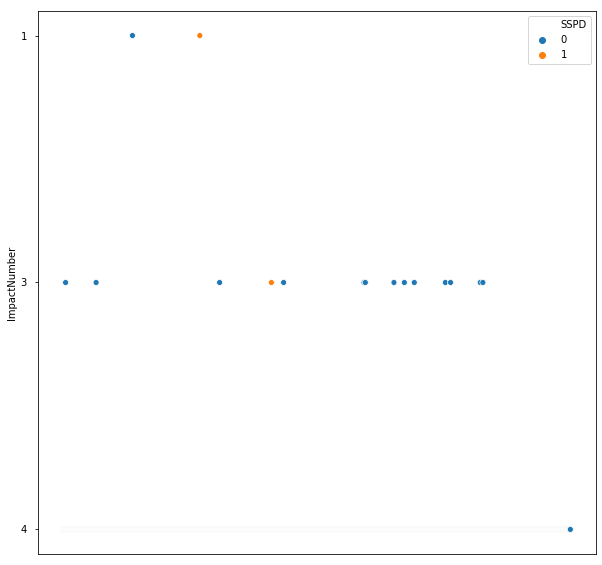

In [47]:
ax1 = sns.scatterplot(x='TASK',y='ImpactNumber',hue='SSPD',data=df_incident)
ax1 = pyplot.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
pyplot.show()
pyplot.close()

In [50]:
ids= df.AppId.unique()
count= df['AppId'].value_counts()
appDf = pd.DataFrame({'id':ids,'count':count})
appDf['SSPD']=appDf['id'].isin(appIdList)
appDf['SSPD']= appDf['SSPD'].apply(lambda x : 0 if not x else 1)

appDf.head(10)

,id,count,SSPD
AP110085,AP110085,8166,0
AP103220,AP107952,6615,0
AP106532,AP125405,5659,1
AP107938,AP130459,4933,0
AP001980,AP103220,4854,0
AX001147,AX001147,4458,0
AP106360,AP110174,4421,0
AP011767,AP112293,3950,0
AP116534,AP119587,3719,0
AP114113,AP128052,3611,0


In [51]:
appDf['count'].describe()

count    1102.000000
mean      197.102541
std       653.380674
min         1.000000
25%         7.000000
50%        17.000000
75%        85.000000
max      8166.000000
Name: count, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002724DD0E208>]],
      dtype=object)

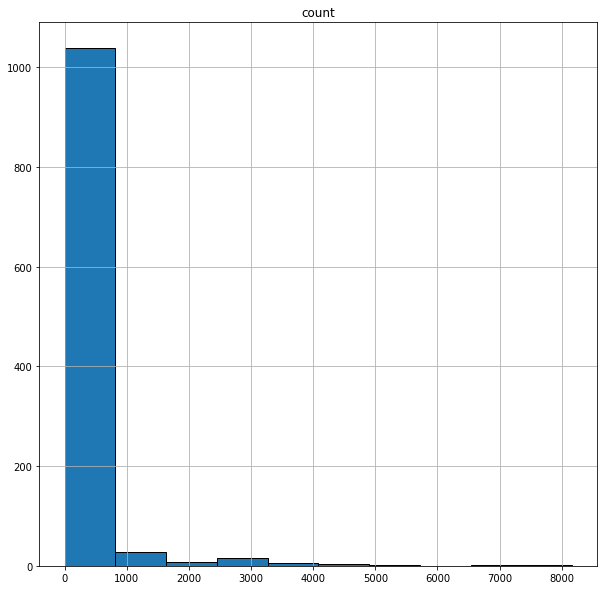

In [52]:
appDf.hist('count')

In [53]:
appDf.groupby('SSPD')
len(appDf['id'].unique())

1102

In [54]:
noSSPD = appDf[appDf['SSPD']==0]
SSPD = appDf[appDf['SSPD']==1]
print("Average Number of Incidents for Applications WITHOUT SSPD  : {}".format(noSSPD['count'].mean()))
print("Average Number of Incidents for Applications WITH SSPD : {}".format(SSPD['count'].mean()))
print("Difference in Average  (SSPD - noSSPD) = {}".format(SSPD['count'].mean()-noSSPD['count'].mean()))

Average Number of Incidents for Applications WITHOUT SSPD  : 216.57687723480333
Average Number of Incidents for Applications WITH SSPD : 134.97718631178708
Difference in Average  (SSPD - noSSPD) = -81.59969092301625


## **** Model *****

In [ ]:
data = Table.from_df(appDf)

In [ ]:
def difference_of_means(table, label, group_label):
    reduced = table.select(label, group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [64]:
observed_difference=difference_of_means(data, 'count', 'SSPD')
print("Observed Difference in average number of Incidents for applications with and without SSPD : {}".format(observed_difference))

Observed Difference in average number of Incidents for applications with and without SSPD : -81.59969092301625


In [27]:
shuffled_labels = data.sample(with_replacement = False).column(2)
original_and_shuffled = data.with_column('Shuffled Label', shuffled_labels)

In [28]:
original_and_shuffled

id,count,SSPD,Shuffled Label
AP110085,8166,0,0
AP107952,6615,0,0
AP125405,5659,1,1
AP130459,4933,0,0
AP103220,4854,0,0
AX001147,4458,0,0
AP110174,4421,0,1
AP112293,3950,0,0
AP119587,3719,0,0
AP128052,3611,0,0


In [29]:
shuffled_only = original_and_shuffled.drop('SSPD')
shuffled_group_means = shuffled_only.group('Shuffled Label', np.average)
shuffled_group_means

Shuffled Label,id average,count average
0,,209.658
1,,157.049


In [30]:
def one_simulated_difference(table, label, group_label):
    shuffled_labels = table.sample(with_replacement = False
                                                    ).column(group_label)
    shuffled_table = table.select(label).with_column(
        'Shuffled Label', shuffled_labels)
    return difference_of_means(shuffled_table, label, 'Shuffled Label') 

In [31]:
one_simulated_difference(data, 'count', 'SSPD')

-95.04900818918048

In [32]:
differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(data, 'count', 'SSPD')
    differences = np.append(differences, new_difference) 

Observed Difference: -81.59969092301625


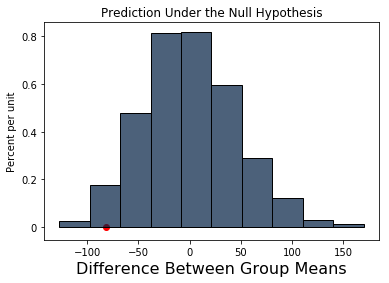

In [33]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
pyplot.title('Prediction Under the Null Hypothesis')
pyplot.scatter(observed_difference,0,color='red')

## The histogram above shows the distribution of the 5,000 values generated from Simulation . It is the empirical distribution of the test statistic simulated under the null hypothesis. This is a prediction about the test statistic, based on the null hypothesis.

In [67]:
empirical_P = np.count_nonzero(differences <= observed_difference) / repetitions
print('Value of Empirical P-value is {}'.format(empirical_P))

Value of Empirical P-value is 0.0296


## The Histogram shows that only 2.9% of the test staistic from 5000 simulation fall under the observed difference of -81.56. Thus, we accept the Alterntive Hypothesis.